In [ ]:
# Datos: http://saludata.saludcapital.gov.co/osb/datos_abiertos_osb/enf-transmisibles/OSB_EnfTransm-COVID-19.csv

In [1]:
import requests
import pandas as pd
import geopandas as gpd

In [2]:
URL = 'http://saludata.saludcapital.gov.co/osb/datos_abiertos_osb/enf-transmisibles/OSB_EnfTransm-COVID-19.csv'
FILEPATH = './data/covid19_bogota_raw.csv'

In [3]:
r = requests.get( URL, stream = True )

with open( FILEPATH, 'wb' ) as f:
    f.write( r.content )

In [4]:
# Loading the data
covid_bog = pd.read_csv( FILEPATH, encoding = 'ISO-8859-1', sep = ';', skiprows = 4, skipfooter = 2 )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [5]:
covid_bog.columns

Index(['ID de caso', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico',
       'Ciudad de residencia', 'Localidad de residencia', 'Edad', 'Sexo',
       'Tipo de caso', 'Ubicación', 'Estado'],
      dtype='object')

In [6]:
covid_bog.shape

(86857, 10)

In [13]:
covid_bog[ 'Fecha de inicio de síntomas' ] = pd.to_datetime( covid_bog[ 'Fecha de inicio de síntomas' ], format = '%d/%m/%Y', errors = 'coerce' )

In [15]:
covid_bog[ 'Fecha de diagnóstico' ] = pd.to_datetime( covid_bog[ 'Fecha de diagnóstico' ], format = '%d/%m/%Y' )

In [16]:
covid_bog[ 'Localidad de residencia' ].replace( { 'Santa Fe': 'Santa Fé' }, inplace = True )

In [17]:
covid_bog[ 'Atencion' ] = covid_bog[ 'Ubicación' ].str.strip()
del covid_bog[ 'Ubicación' ]

In [18]:
covid_bog[ 'Estado' ] = covid_bog[ 'Estado' ].str.strip()

In [19]:
covid_bog.dtypes

ID de caso                              int64
Fecha de inicio de síntomas    datetime64[ns]
Fecha de diagnóstico           datetime64[ns]
Ciudad de residencia                   object
Localidad de residencia                object
Edad                                    int64
Sexo                                   object
Tipo de caso                           object
Estado                                 object
Atencion                               object
dtype: object

In [20]:
def get_age_group( x ):
    if x <= 19:
        return '0 - 19'
    elif x > 19 and x <= 39:
        return '20 - 39'
    elif x > 39 and x <= 59:
        return '40 - 59'
    elif x > 59 and x <= 79:
        return '60 - 79'
    elif x > 79:
          return '80+'
    else:
        return None

covid_bog[ 'Grupo de edad' ] = covid_bog[ 'Edad' ].apply( get_age_group )

In [21]:
covid_bog.replace( { 'Fallecido (No aplica, No causa Directa)': 'Fallecido', 'Fallecido(No aplica': 'Fallecido', 'fallecido': 'Fallecido', 'hospital': 'Hospital', 'leve': 'Leve' }, inplace = True )

In [22]:
covid_bog.rename( columns = { 'ID de caso': 'ID_caso', 'Fecha de inicio de síntomas': 'Fecha_inicio_sintomas', 'Fecha de diagnóstico': 'Fecha_diagnostico', 'Ciudad de residencia': 'Ciudad', 'Localidad de residencia': 'Localidad', 'Tipo de caso': 'Tipo', 'Ubicación': 'Atencion', 'Grupo de edad': 'Grupo_de_edad' }, inplace = True )

In [32]:
covid_bog = covid_bog[ [ 'ID_caso', 'Fecha_inicio_sintomas', 'Fecha_diagnostico', 'Ciudad', 'Localidad', 'Edad', 'Sexo', 'Tipo', 'Atencion', 'Estado', 'Grupo_de_edad' ] ]

In [33]:
covid_bog.dtypes

ID_caso                           int64
Fecha_inicio_sintomas    datetime64[ns]
Fecha_diagnostico        datetime64[ns]
Ciudad                           object
Localidad                        object
Edad                              int64
Sexo                             object
Tipo                             object
Atencion                         object
Estado                           object
Grupo_de_edad                    object
dtype: object

In [34]:
covid_bog.tail()

,ID_caso,Fecha_inicio_sintomas,Fecha_diagnostico,Ciudad,Localidad,Edad,Sexo,Tipo,Atencion,Estado,Grupo_de_edad
86852,86853,2020-06-12,2020-06-25,Bogotá,Los Mártires,46,M,En estudio ...,Hospital,Recuperado,40 - 59
86853,86854,2020-06-28,2020-07-18,Fuera de Bogotá,Fuera de Bogotá,71,M,En estudio ...,Hospital,Moderado,60 - 79
86854,86855,2020-07-07,2020-07-19,Fuera de Bogotá,Fuera de Bogotá,27,F,En estudio ...,Casa,Leve,20 - 39
86855,86856,2020-07-13,2020-07-22,Fuera de Bogotá,Fuera de Bogotá,28,M,En estudio ...,Casa,Leve,20 - 39
86856,86857,2020-07-03,2020-07-21,Fuera de Bogotá,Fuera de Bogotá,29,M,En estudio ...,Hospital,Moderado,20 - 39


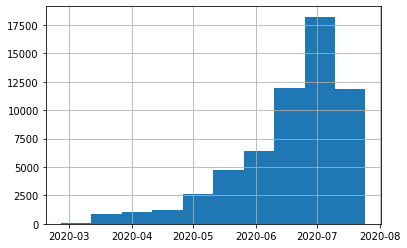

In [35]:
covid_bog[ 'Fecha_inicio_sintomas' ].hist()

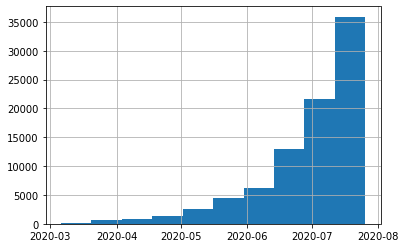

In [36]:
covid_bog[ 'Fecha_diagnostico' ].hist()

In [37]:
covid_bog[ 'Atencion' ].unique()

array(['Casa', 'Fallecido', 'Hospital', 'Hospital UCI'], dtype=object)

In [38]:
covid_bog[ 'Estado' ].unique()

array(['Recuperado', 'Fallecido', 'Grave', 'Moderado', 'Leve'],
      dtype=object)

In [39]:
covid_bog.to_csv( './data/covid19_bogota.csv', index = False )